#### 
- seaborn lineplot 또는 matplotlib plot 활용
- x축: 시점, y축 : 서울 의사 일반의

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list

In [2]:
pd_data = pd.read_csv('시도별_의료인력_현황_20230416213816_dl2.csv', encoding='cp949', header=[0,1,2])

pd_data.head()

pd_data.columns


MultiIndex([('시점',  '시점',  '시점'),
            ('서울',  '의사', '일반의'),
            ('서울',  '의사', '전문의'),
            ('서울', '간호사',  '소계'),
            ('부산',  '의사', '일반의'),
            ('부산',  '의사', '전문의'),
            ('부산', '간호사',  '소계'),
            ('대구',  '의사', '일반의'),
            ('대구',  '의사', '전문의'),
            ('대구', '간호사',  '소계'),
            ('인천',  '의사', '일반의'),
            ('인천',  '의사', '전문의'),
            ('인천', '간호사',  '소계'),
            ('광주',  '의사', '일반의'),
            ('광주',  '의사', '전문의'),
            ('광주', '간호사',  '소계'),
            ('대전',  '의사', '일반의'),
            ('대전',  '의사', '전문의'),
            ('대전', '간호사',  '소계'),
            ('울산',  '의사', '일반의'),
            ('울산',  '의사', '전문의'),
            ('울산', '간호사',  '소계')],
           )

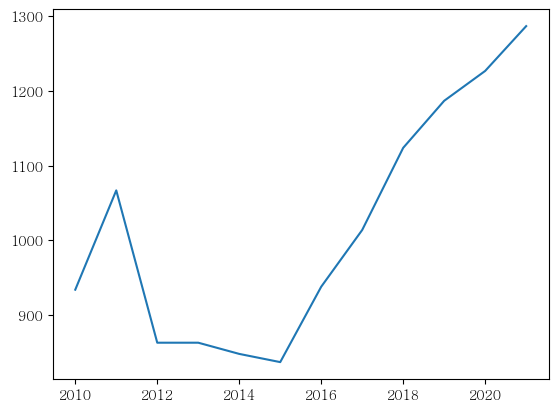

In [3]:
fig, axe = plt.subplots()

x = pd_data[('시점', '시점', '시점')]
y = pd_data[('서울', '의사', '일반의')]

axe.plot(x,y)

c:\Python311\Lib\site-packages\seaborn\relational.py:982: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (3 levels on the left, 1 on the right)
  g.data = pd.merge(


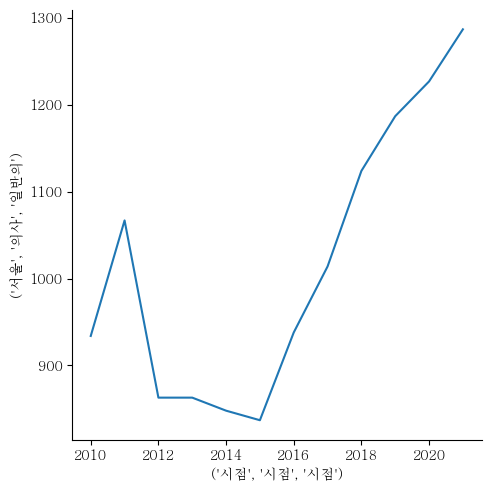

In [4]:
sns.relplot(data=pd_data, x=('시점', '시점', '시점'), y=('서울', '의사', '일반의'), kind='line')

In [5]:
pd_data.set_index(('시점','시점','시점'), inplace=True)
pd_data.index.name='시점'

pd_data = pd_data.stack(level=0)


pd_data = pd_data.reset_index()

pd_data = pd_data.set_index('level_1')
pd_data.index.name = '지역별'


pd_data


시점    간호사    의사       
              소계   일반의    전문의
지역별                          
광주   2010   4538    91   2024
대구   2010   6143   138   3370
대전   2010   3874   149   2136
부산   2010   9268   337   4698
서울   2010  28634   934  16102
..    ...    ...   ...    ...
대전   2021   7871   174   3026
부산   2021  19794   377   6966
서울   2021  58773  1287  25109
울산   2021   5044   101   1570
인천   2021  12656   260   4433

[84 rows x 4 columns]

c:\Python311\Lib\site-packages\seaborn\relational.py:982: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  g.data = pd.merge(


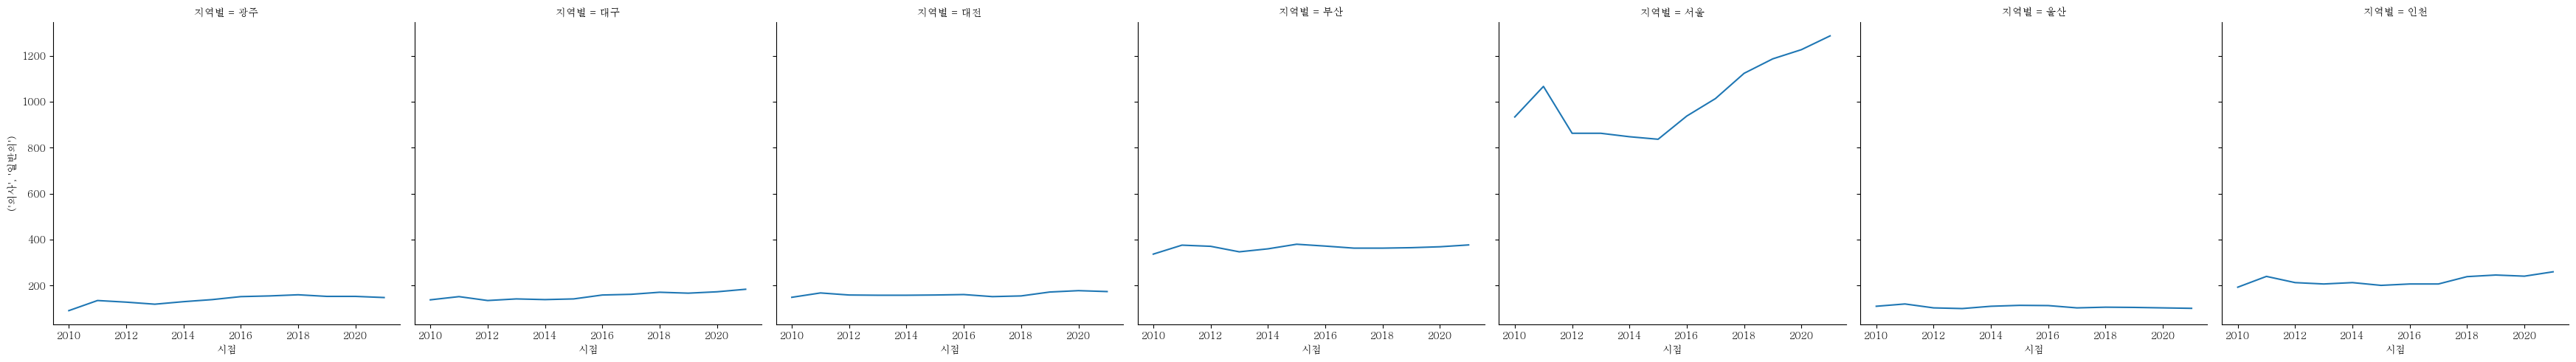

In [6]:
sns.relplot(data=pd_data, x=('시점'), y=('의사', '일반의'), col='지역별', kind='line')

In [7]:
pd_data = pd.read_csv('시도별_의료인력_현황_20230416213816_dl2.csv', encoding='cp949', header=[0,1,2])

df1 = pd_data.set_index(('시점', '시점', '시점')).stack(level=0)
df1.index.names=['시점','지역']
df1.columns = ['간호사','일반의_의사', '전문의_의사']

df1

간호사  일반의_의사  전문의_의사
시점   지역                       
2010 광주   4538      91    2024
     대구   6143     138    3370
     대전   3874     149    2136
     부산   9268     337    4698
     서울  28634     934   16102
...        ...     ...     ...
2021 대전   7871     174    3026
     부산  19794     377    6966
     서울  58773    1287   25109
     울산   5044     101    1570
     인천  12656     260    4433

[84 rows x 3 columns]

In [8]:
df2 = df1.reset_index()

df2

,시점,지역,간호사,일반의_의사,전문의_의사
0,2010,광주,4538,91,2024
1,2010,대구,6143,138,3370
2,2010,대전,3874,149,2136
3,2010,부산,9268,337,4698
4,2010,서울,28634,934,16102
...,...,...,...,...,...
79,2021,대전,7871,174,3026
80,2021,부산,19794,377,6966
81,2021,서울,58773,1287,25109
82,2021,울산,5044,101,1570


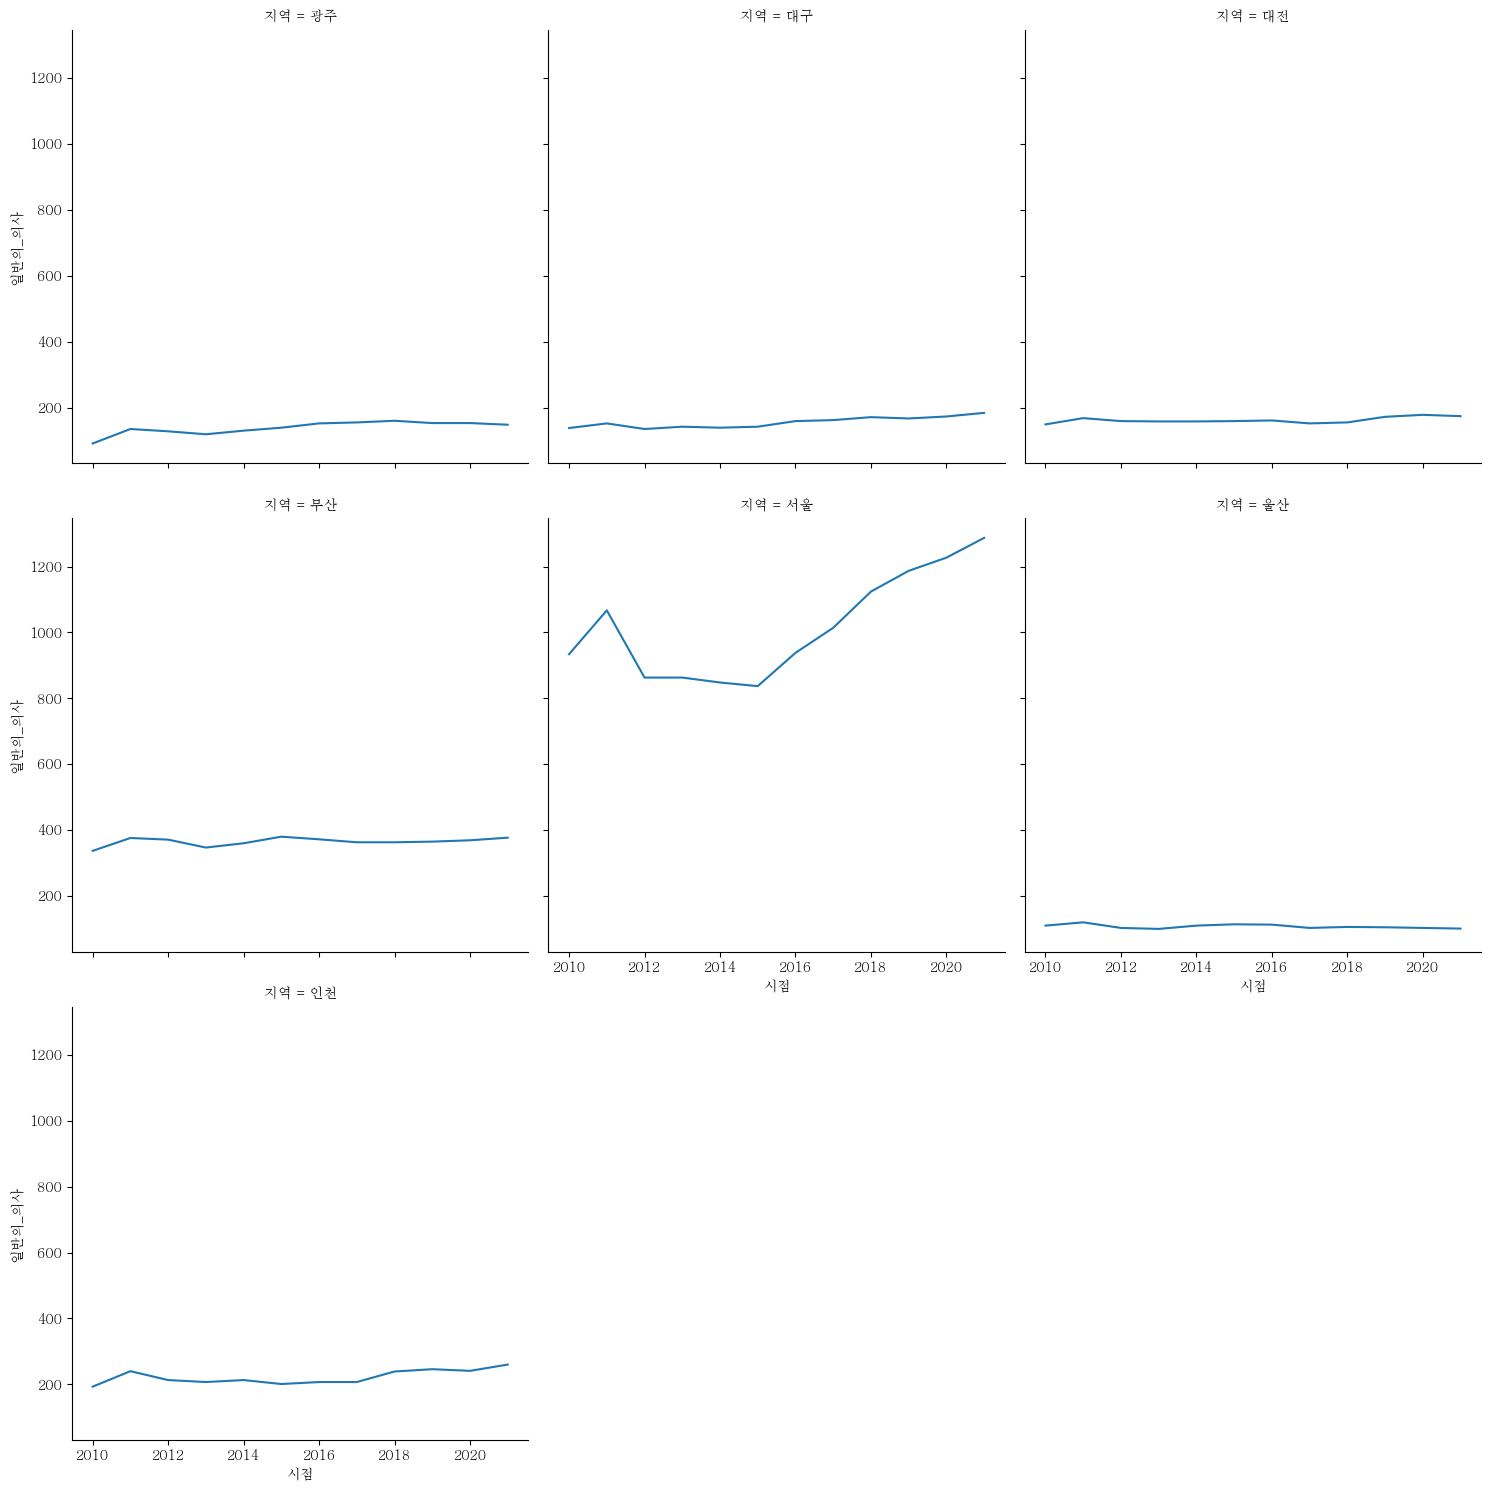

In [9]:
sns.relplot(data=df2, x='시점', y='일반의_의사', col='지역', col_wrap=3, kind='line')

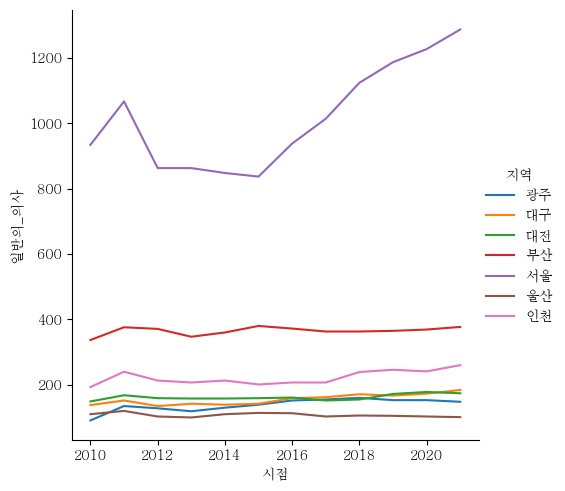

In [10]:
sns.relplot(data=df2, x='시점', y='일반의_의사', hue='지역', kind='line')

In [11]:
pd_data = pd.read_csv('시도별_의료인력_현황_20230416213816_dl2.csv', encoding='cp949', header=[0,1,2])

pd_data.set_index(('시점','시점','시점'), inplace=True)
pd_data = pd_data.stack(level=0)
pd_data.index.names = ['시점', '지역']
pd_data.columns = ['간호사', '일반의_의사', '전문의_의사']
pd_data = pd_data.stack(level=0)
df3 = pd_data.reset_index()
df3.columns = ['시점', '지역', '직종', '인원수']


df3

# lineplot
# x : 시점, y : 명 수
# 각 지역별 개별 Plot
# 간호사/일반의_의사/전문의_의사 구분

,시점,지역,직종,인원수
0,2010,광주,간호사,4538
1,2010,광주,일반의_의사,91
2,2010,광주,전문의_의사,2024
3,2010,대구,간호사,6143
4,2010,대구,일반의_의사,138
...,...,...,...,...
247,2021,울산,일반의_의사,101
248,2021,울산,전문의_의사,1570
249,2021,인천,간호사,12656
250,2021,인천,일반의_의사,260


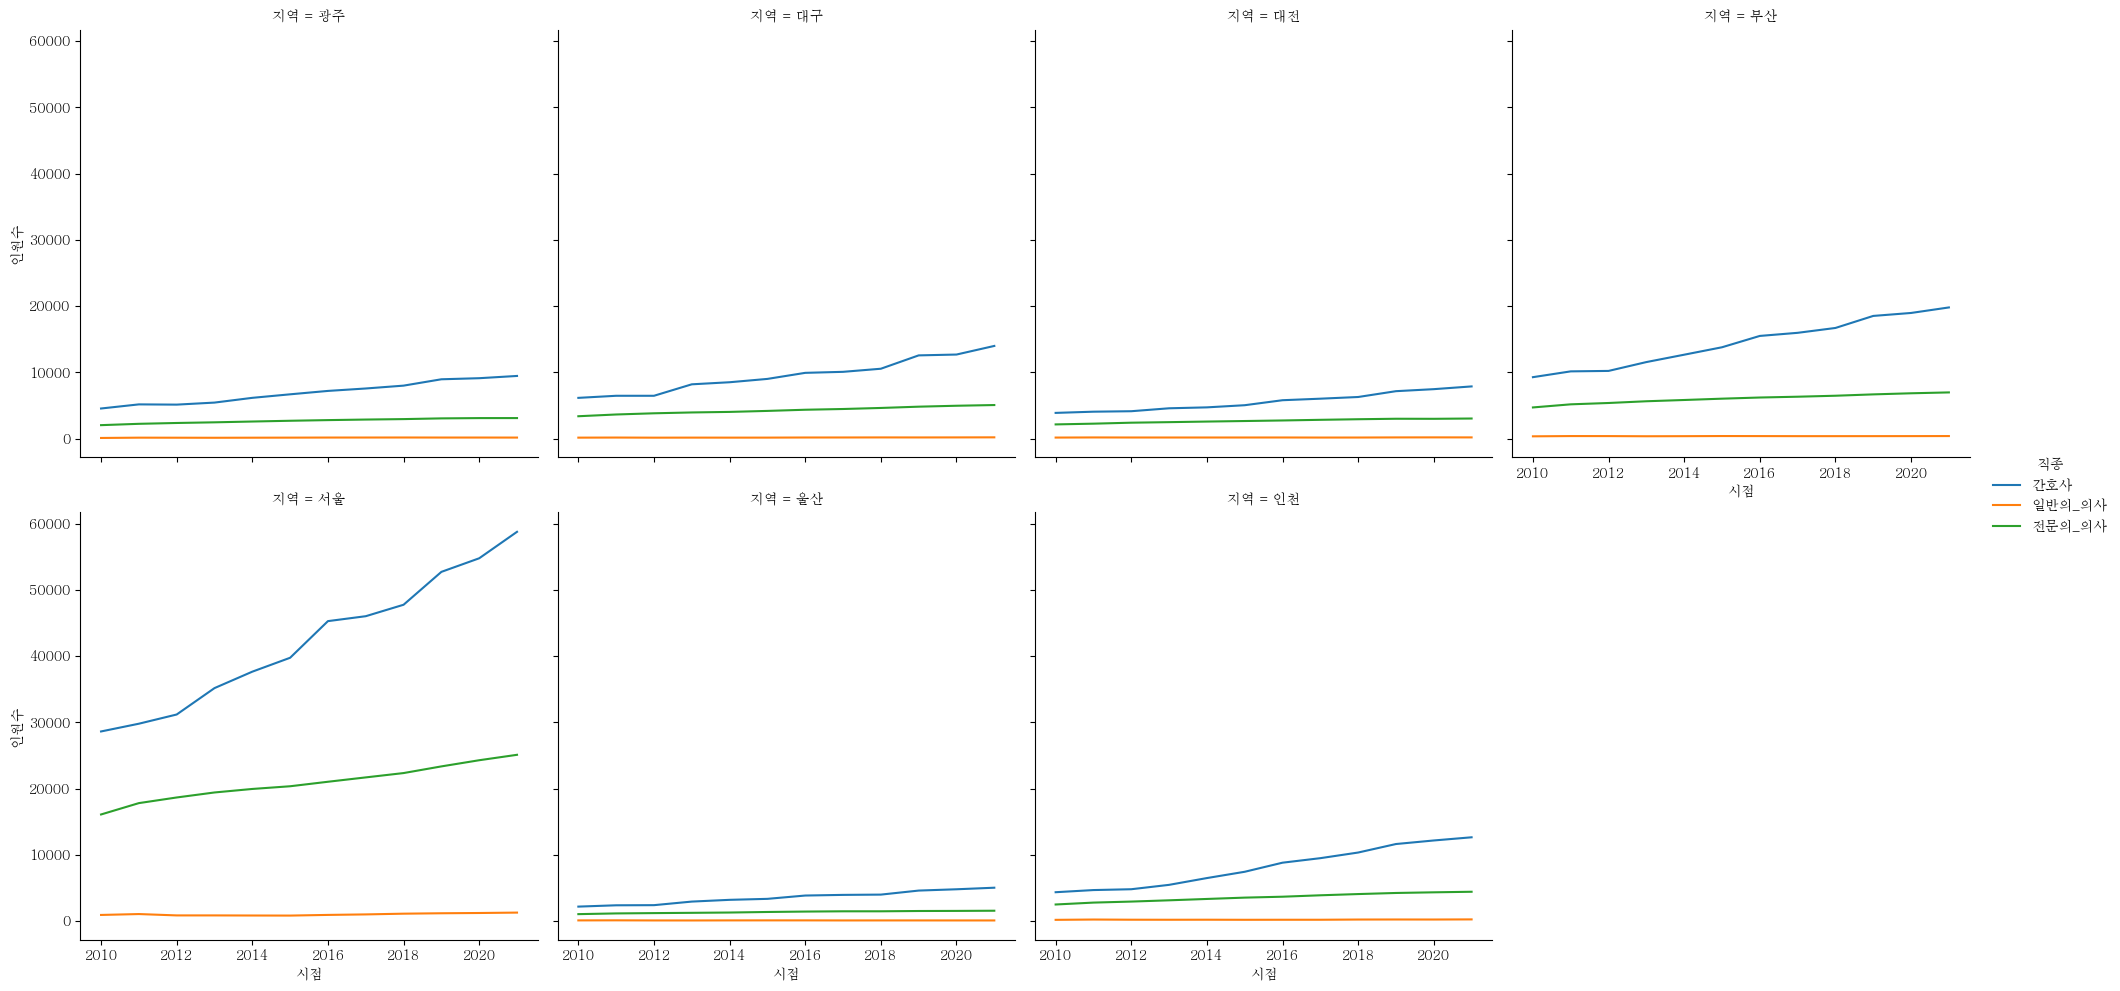

In [12]:
sns.relplot(data=df3, x='시점', y='인원수', col='지역', col_wrap=4, hue='직종', kind='line')

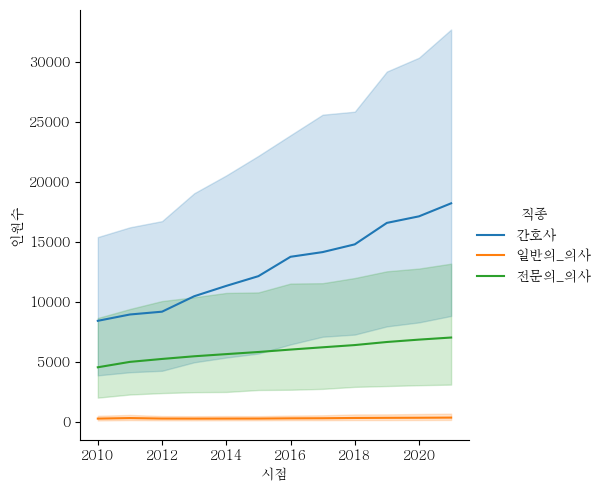

In [13]:
sns.relplot(data=df3, x='시점', y='인원수', hue='직종', kind='line')